In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pynbody
import os, h5py

In [2]:
size_cut_mpc = "70 kpc"

s = pynbody.load(".data/other_data/342447.hdf5")
s.physical_units()

print("avaiable types" , s.families())

avaiable types [<Family gas>, <Family dm>, <Family star>, <Family bh>]


/home/tmassagl/development/pynbody/.venv/lib/python3.12/site-packages/pynbody/snapshot/gadgethdf.py:686: UserWarning: Unable to find cosmological factors in HDF file; assuming position is 3.09e+21 a h**-1
  warnings.warn("Unable to find cosmological factors in HDF file; assuming position is %s" % dist_unit)
/home/tmassagl/development/pynbody/.venv/lib/python3.12/site-packages/pynbody/snapshot/gadgethdf.py:691: UserWarning: Unable to find cosmological factors in HDF file; assuming velocity is 1.00e+05 a**1/2
  warnings.warn("Unable to find cosmological factors in HDF file; assuming velocity is %s" % vel_unit)
/home/tmassagl/development/pynbody/.venv/lib/python3.12/site-packages/pynbody/snapshot/gadgethdf.py:449: UserWarning: Masses are either stored in the header or have another dataset name; assuming the cosmological factor h**-1
  warnings.warn("Masses are either stored in the header or have another dataset name; assuming the cosmological factor %s" % units.h**-1)


In [41]:
s.star.loadable_keys()

['metals',
 'SubfindID',
 'vel',
 'ProgGalaxyMassInRadAtStripping',
 'AfterInfall',
 'ProgSubhaloMassAtStripping',
 'InSitu',
 'iord',
 'DistanceToHostAtStripping',
 'SubfindVelDisp',
 'DistanceAtFormation',
 'ProgGalaxyMassAtStripping',
 'aform',
 'BirthPos',
 'GFM_StellarPhotometrics',
 'SnapNumAtStripping',
 'AccretionOrigin',
 'SubfindHsml',
 'SubfindDMDensity',
 'BirthVel',
 'RotatedCoordinates',
 'SubfindDensity',
 'MainSnapshotIndex',
 'GFM_MetalsTagged',
 'MergerMassRatio',
 'phi',
 'GFM_InitialMass',
 'SnapNumAtFormation',
 'pos',
 'mass',
 'StellarHsml',
 'RotatedVelocities',
 'GFM_Metals',
 'SubfindIDAtFormation']

In [3]:
pynbody.analysis.halo.center(s)

/home/tmassagl/development/pynbody/.venv/lib/python3.12/site-packages/pynbody/snapshot/gadgethdf.py:469: UserWarning: Unable to infer units from HDF attributes
  warnings.warn("Unable to infer units from HDF attributes")


<Transformation translate, offset_velocity>

In [4]:
mask = pynbody.filt.Sphere(size_cut_mpc)
s_cut = s.gas[mask]

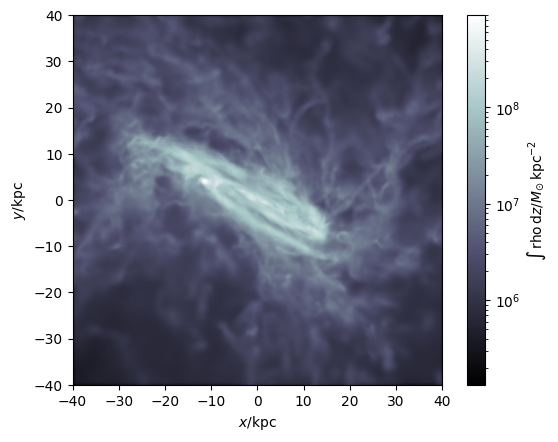

In [45]:
map_out = pynbody.plot.sph.image(
                                  s_cut
                                 , width= str(80)+" kpc"
                                 , qty="rho"
                                 , av_z=None           
                                 , units="Msol kpc^-2"
                                 , resolution=512
                                 , cmap="bone",noplot=False
                                 )


plt.show()

In [6]:
mask

Sphere('7.00e+01 kpc', array([0, 0, 0]))

In [7]:
s_cut.loadable_keys()

['Xray_Emission_Line_CV',
 'metals',
 'MagneticFieldDivergence',
 'SubfindID',
 'vel',
 'Xray_Emission_Line_NVII',
 'rho',
 'RotatedMagneticField',
 'Xray_Emission_05_2keV_C',
 'CenterOfMass',
 'MH',
 'Xray_Emission_03_2keV_C',
 'GFM_CoolingRate',
 'RotatedCenterOfMass',
 'iord',
 'StarFormationRate',
 'NeutralHydrogenAbundance',
 'MH2GK',
 'Xray_Emission_Line_FeXVII',
 'Xray_Emission_Line_OVIIf',
 'SubfindVelDisp',
 'ElectronAbundance',
 'EnergyDissipation',
 'MagneticField',
 'Xray_Emission_Line_OVIII',
 'GFM_WindDMVelDisp',
 'SubfindHsml',
 'SubfindDMDensity',
 'Xray_Emission_Line_NeX',
 'GFM_WindHostHaloMass',
 'u',
 'RotatedCoordinates',
 'SubfindDensity',
 'MainSnapshotIndex',
 'GFM_MetalsTagged',
 'Xray_Emission_Line_OVIIr',
 'phi',
 'MH2BR',
 'Xray_Emission_05_2keV',
 'Xray_Emission_Line_CVI',
 'pos',
 'Xray_Emission_Line_NVI',
 'Xray_Emission_03_2keV',
 'mass',
 'MH2KMT',
 'Machnumber',
 'GFM_AGNRadiation',
 'RotatedVelocities',
 'GFM_Metals',
 'InternalEnergyOld']

In [23]:
qt = ["x","y","z","mass","rho"]
qt_units = [str(s_cut[x].units) for x in qt]

In [9]:
out_path = ".data/out/gas_illustris_342447_cut"

with h5py.File(f"{out_path}.hdf5", "w") as f:
    for qt, qt_unit in zip(qt, qt_units):
        xx = np.array(s_cut[qt].in_units(qt_unit))
        __ = f.create_dataset(qt, data = xx)

In [10]:
import pandas as pd

In [24]:
qt

['x', 'y', 'z', 'mass', 'rho']

In [26]:
df = pd.DataFrame([list(s_cut[x].in_units(y)) for x, y in zip(qt, qt_units)]).transpose()
df.columns = qt

In [27]:
df.dtypes

x       float64
y       float64
z       float64
mass    float64
rho     float64
dtype: object

In [28]:
with open(f"{out_path}.ascii", "w") as f:
    f.write(df.to_string(index=False))

In [29]:
# Read the ascii output test

f = pynbody.snapshot.ascii.AsciiSnap(".data/out/gas_illustris_342447_cut.ascii")

In [30]:
f.physical_units()

In [31]:
f["x"]

SimArray([-1.180393, -1.596977, -1.386956, ...,  0.545694, -0.349543,
           0.267881], shape=(642248,), 'kpc')

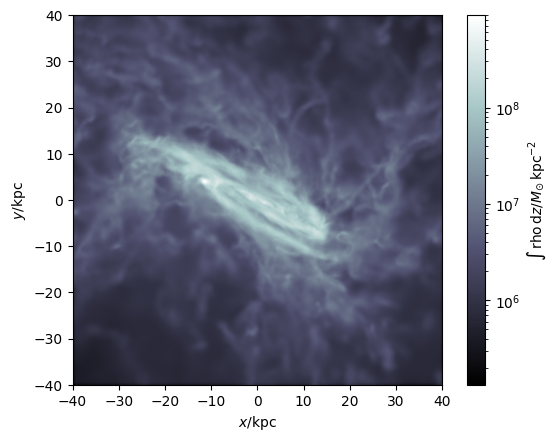

In [32]:
map_out = pynbody.plot.sph.image(
                                f,
                                width= str(80)+" kpc",
                                qty="rho",
                                av_z=None, 
                                units="Msol kpc^-2",
                                resolution=512,
                                cmap="bone",noplot=False,
                                )

plt.show()